# Generating samples and parsing parameters scan file



In [6]:
from GENE_ML.samplers.uniform import Uniform
from GENE_ML.executors.ScanExecutor import ScanExecutor
from GENE_ML.runners.GENErunner import GENErunner
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))
from parsers.GENEparser import GENE_scan_parser


parameters = ['box-kymin', '_grp_species_1-omt', 'species-omn']
bounds = [(0.05,1), (10,70), (5,60)]
num_samples = 5000
sampler = Uniform(parameters=parameters, bounds=bounds, num_samples=num_samples)
base_params_path = os.path.join(os.getcwd(),'parameters_base_dp')
parser = GENE_scan_parser(base_params_path)
runner = GENErunner(parser)

##Executor
executor = ScanExecutor(num_workers=5, sampler=sampler, runner=runner, base_run_dir=base_run_dir)
#Here the executor would divide the samples into batches that will be ran in paralell in seperate sbatch jobs
# it will also make the batch scripts to run each one.

##    Parser args
# base_params_path = os.path.join(os.getcwd(),'parameters_base_dp')
# parser = GENE_scan_parser(base_params_path)
# parser.write_input_file(sampler.samples, run_dir=os.getcwd(), file_name='parameters_5000')

## Runner
# the runner would ssh into lumi and run the parameter files

# if project == 'UQ':
#     #UQ
#     ##Sampler args dependant on sampler chosen
#     parameters = ['box-kymin', '_grp_species_0-omt', '_grp_species_1-omt']
#     bounds = [(0.1,100.0),(2,3.5), (4,6.75)]
#     ##Parser args
#     base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')


#Sampling the data

Writing to /home/djdaniel/DEEPlasma


In [14]:
import subprocess
import os
words = 'unicorn squid\n golden puppy'
subprocess.run(['echo', words])

os.system(f'echo {words}')

unicorn squid
 golden puppy
unicorn squid


sh: 2: golden: not found


32512

# Pulling Scanlog from Lumi 

In [2]:
from GENE_ML.dataset.ScanData import ScanData
#data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
data_set = ScanData('3560_3p', test_percentage=50)

Initialising dataset
LOADING SCAN LOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/3560_3p_scan.log
NaN percentage =  37.16
RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50 training.


# Making Surrogate Model and Visualising Performance

# SVM

In [3]:

#imports
from GENE_ML.models.SVM import SVM
from GENE_ML import visualise as vis


#Sampling already done, gene has been ran
#data_set = ScanData(name='100_3p', test_percentage=3)
svm = SVM()
svm.train(data_set.x_train, data_set.growthrate_train)

growthrate_predict_seen = svm.predict(data_set.x_train)
growthrate_predict_unseen = svm.predict(data_set.x_test)

In [4]:
print(type(growthrate_predict_seen))

<class 'numpy.ndarray'>


/home/djdaniel/DEEPlasma/GENE_ML/visualise.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cb = ax.scatter(y_true, y_predicted, marker='X', c=y_pred_err, cmap='summer')
/tmp/ipykernel_16300/3667612972.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_residuals.show()


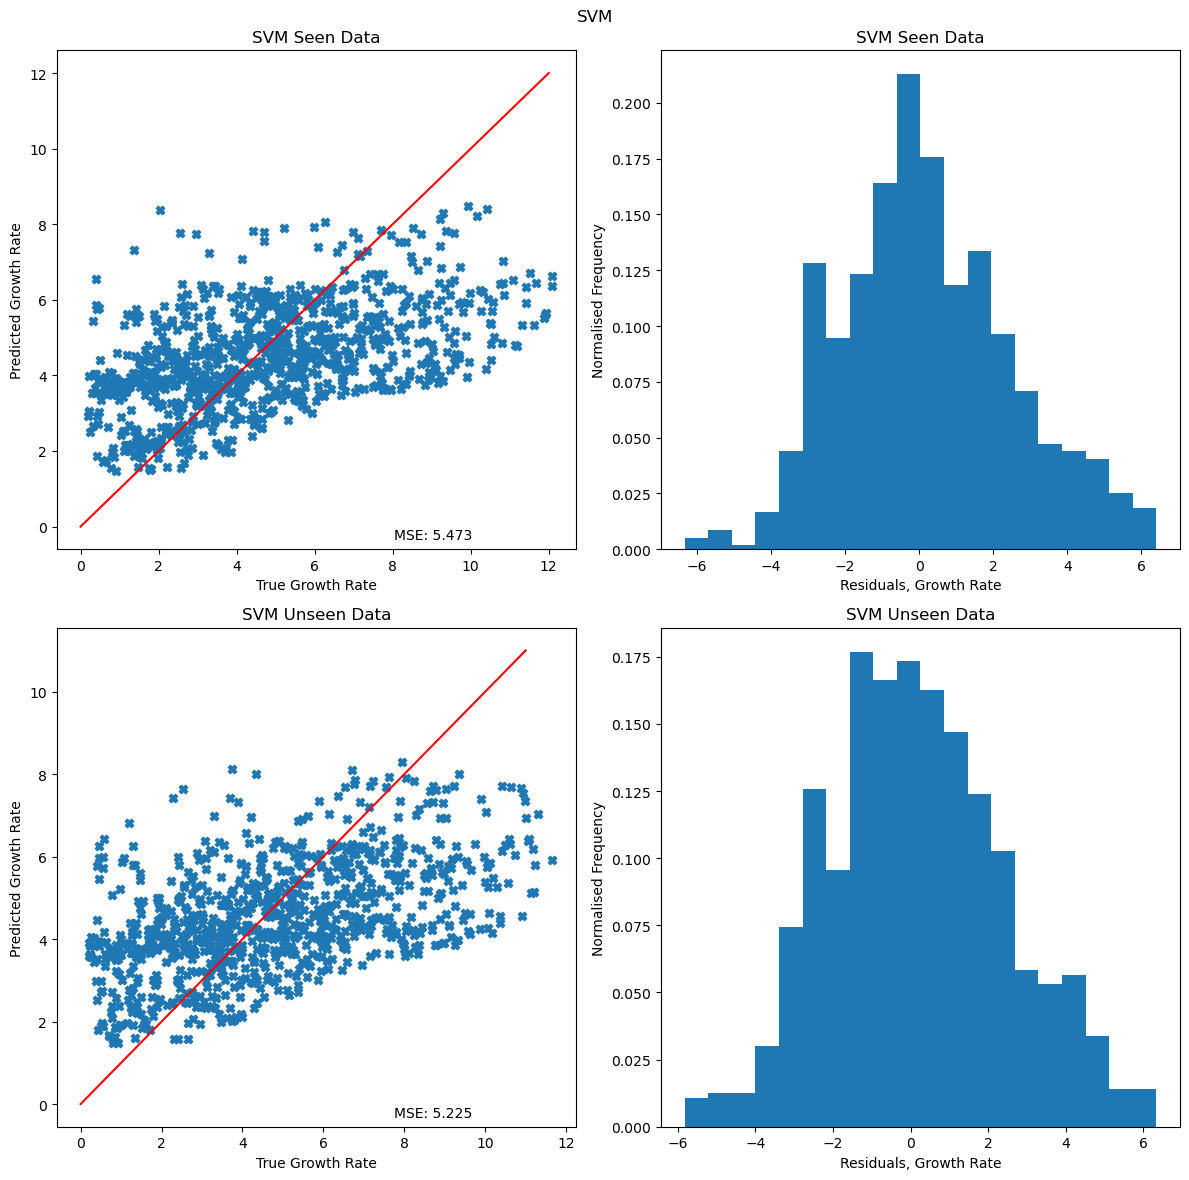

In [5]:
import matplotlib.pyplot as plt
model_name = 'SVM'
ncol=2
nrow=2
size=6
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow))
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()

# GPR

In [15]:
import matplotlib.pyplot as plt
from GENE_ML.dataset.ScanData import ScanData
#data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
data_set = ScanData('3560_3p', test_percentage=50)


#imports
from GENE_ML.models.GPR import GPR
from GENE_ML import visualise as vis


#Sampling already done, gene has been ran
#data_set = ScanData(name='100_3p', test_percentage=3)
gpr = GPR()
gpr.train(data_set.x_train, data_set.growthrate_train)
gpr.tune_hypers(data_set.x_train, data_set.growthrate_train)

growthrate_predict_seen, growthrate_predict_seen_errors = gpr.predict(data_set.x_train)
growthrate_predict_unseen, growthrate_predict_unseen_errors = gpr.predict(data_set.x_test)




Initialising dataset
LOADING SCAN LOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/3560_3p_scan.log
NaN percentage =  37.16
RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50 training.
GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 3384.4284595249255
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (4,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -482.43882282531416
Optimization restart 2/3, f = -482.4388228260556
Optimization restart 3/3, f = -482.4388228211606
RESULTING HYPERS:
 
Name : GP regression
Objective : -482.438822826055

 /tmp/ipykernel_5904/2892499458.py:15: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


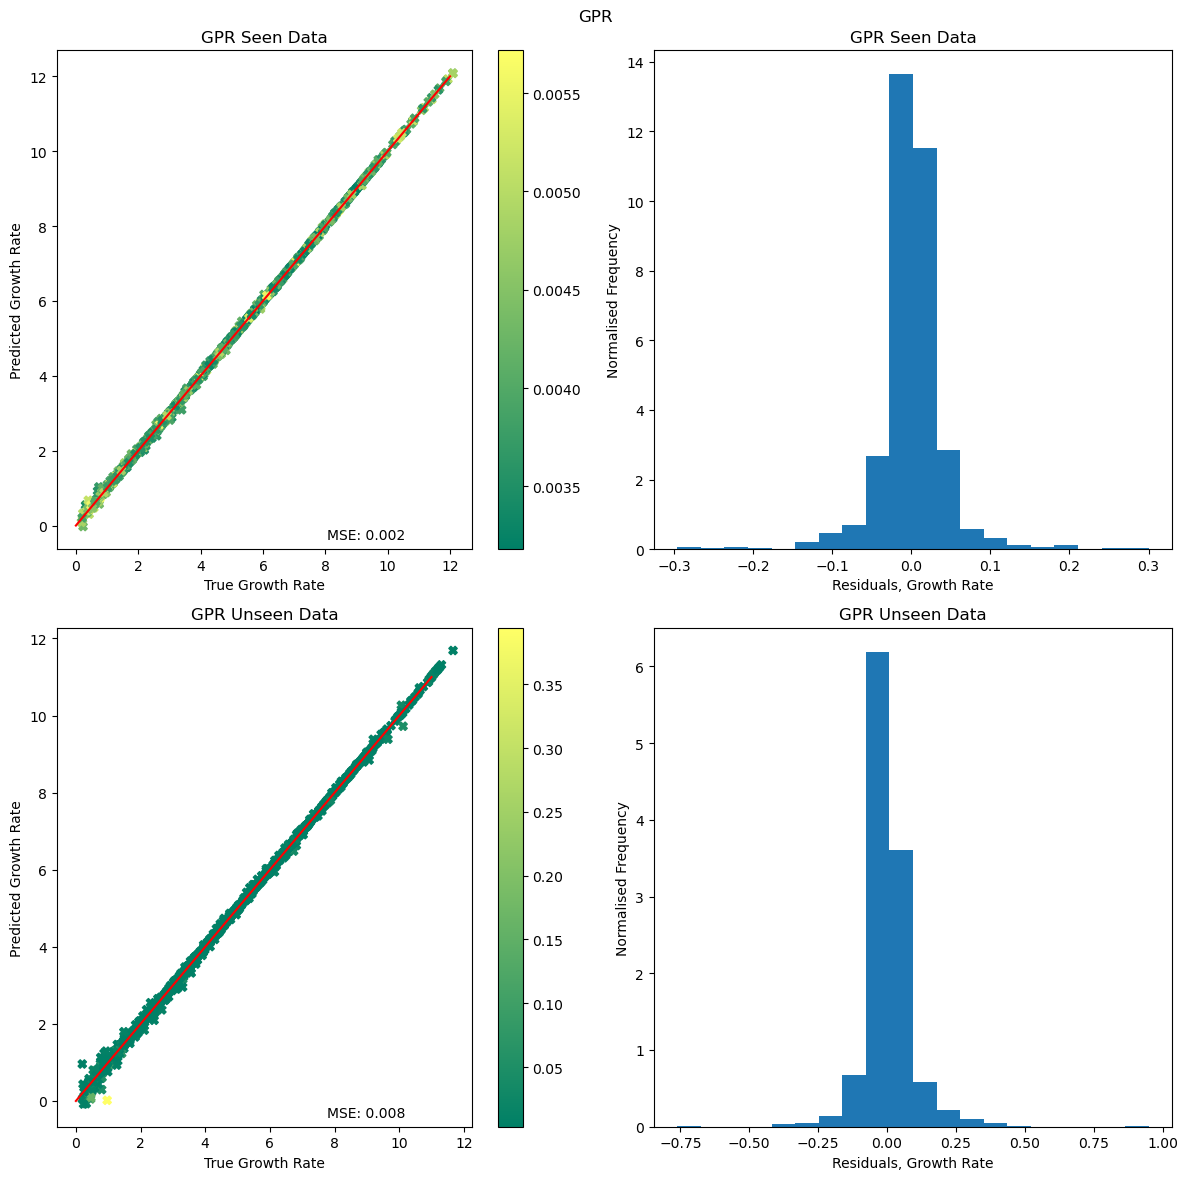

In [9]:
ncol=2
nrow=2
size=6
model_name = 'GPR'
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow))
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', y_pred_err=growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', y_pred_err=growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()
